In [1]:
import geopandas as gpd
import pandas as pd
import folium
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
top_ten = pd.read_csv('data/all_tracts_pct_change.csv')

In [3]:
path = 'data/county/tl_2021_47_tract/tl_2021_47_tract.shp'
tiger_df = gpd.read_file(path)
tiger_df = tiger_df.to_crs("EPSG:4326")

davidson_gdf = tiger_df.loc[(tiger_df.COUNTYFP == '037')]
davidson_gdf['TRACTCE'] = davidson_gdf['TRACTCE'].astype(str)
davidson_gdf['TRACTCE'] = '37' + davidson_gdf['TRACTCE']
davidson_gdf['TRACTCE'] = davidson_gdf['TRACTCE'].astype(int)

/home/nhac/anaconda3/envs/py-geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
davidson_gdf = davidson_gdf[['TRACTCE','geometry']]

In [5]:
davidson_gdf.columns = ['tract_number', 'geometry'] 

In [6]:
type(davidson_gdf)

geopandas.geodataframe.GeoDataFrame

In [7]:
top_ten.loc[top_ten['tract_number'] == 37013700]

,Unnamed: 0,tract_number,pct_change
47,95,37013700,720.238095


In [8]:
del top_ten['Unnamed: 0']

In [9]:
join_gdf = pd.merge(left=davidson_gdf, right=top_ten, on='tract_number')

In [11]:
join_gdf

,tract_number,geometry,pct_change
0,37013202,"POLYGON ((-86.88928 36.16390, -86.88908 36.163...",255.098133
1,37013201,"POLYGON ((-86.89207 36.14293, -86.89191 36.143...",208.252427
2,37018409,"POLYGON ((-86.98718 36.07301, -86.98711 36.073...",115.082241
3,37018410,"POLYGON ((-86.94693 36.07136, -86.94679 36.071...",111.692465
4,37015804,"POLYGON ((-86.71027 36.14236, -86.70897 36.142...",170.738575
...,...,...,...
129,37017500,"POLYGON ((-86.75765 36.08379, -86.75758 36.083...",261.842105
130,37015613,"POLYGON ((-86.71198 36.10101, -86.71187 36.101...",134.994641
131,37010301,"POLYGON ((-86.74132 36.29354, -86.74119 36.293...",106.188169
132,37010802,"POLYGON ((-86.75148 36.24075, -86.75135 36.240...",172.636364


In [ ]:
top_ten

In [ ]:
# map1 = folium.Map([36.174465, -86.767960], tiles='cartodbpositron', zoom_start=10)

In [ ]:
#ax = gplt.choropleth(join_gdf, hue= 'pct_change', legend=True, cmap='YlGnBu', projection=gcrs.AlbersEqualArea())
#gplt.polyplot(davidson_gdf, projection=gcrs.AlbersEqualArea(), ax = ax)
#ax.set_facecolor('lightgrey')

In [13]:
join_gdf

,tract_number,geometry,pct_change
0,37013202,"POLYGON ((-86.88928 36.16390, -86.88908 36.163...",255.098133
1,37013201,"POLYGON ((-86.89207 36.14293, -86.89191 36.143...",208.252427
2,37018409,"POLYGON ((-86.98718 36.07301, -86.98711 36.073...",115.082241
3,37018410,"POLYGON ((-86.94693 36.07136, -86.94679 36.071...",111.692465
4,37015804,"POLYGON ((-86.71027 36.14236, -86.70897 36.142...",170.738575
...,...,...,...
129,37017500,"POLYGON ((-86.75765 36.08379, -86.75758 36.083...",261.842105
130,37015613,"POLYGON ((-86.71198 36.10101, -86.71187 36.101...",134.994641
131,37010301,"POLYGON ((-86.74132 36.29354, -86.74119 36.293...",106.188169
132,37010802,"POLYGON ((-86.75148 36.24075, -86.75135 36.240...",172.636364


Text(0.5, 1.0, 'Percent Increase in Median Sales Price by Census Tract (2010-2020)')

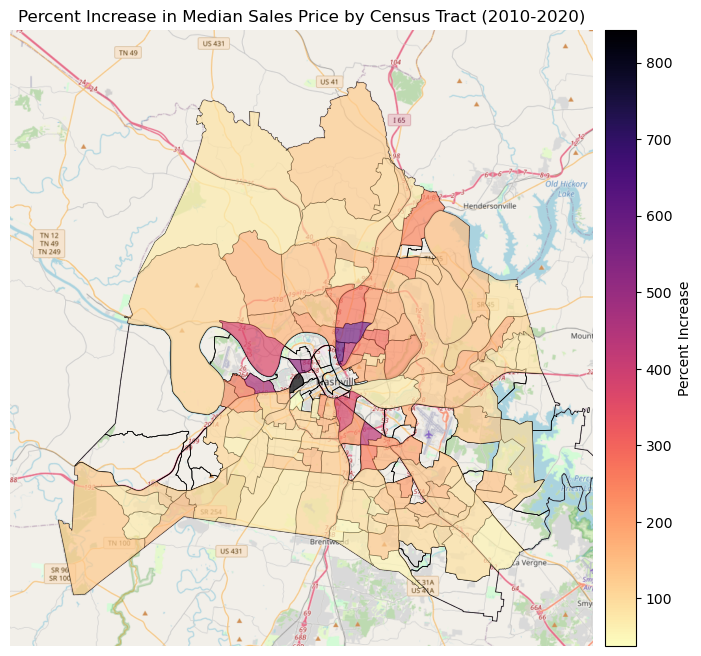

In [12]:
ax = gplt.webmap(join_gdf,
                 figsize=(16, 8),
                 projection=gcrs.WebMercator())

gplt.polyplot(davidson_gdf, 
              linewidth=0.5,
              ax=ax
)

gplt.choropleth(
    join_gdf, 
    hue='pct_change',
    legend=True,
    legend_kwargs={'anchor': (0.0,0.0), 'pad':0.01, 'label':'Percent Increase'},
    cmap='magma_r', 
    alpha=0.7, 
    projection=gcrs.AlbersEqualArea(), 
    ax = ax
)
plt.title('Percent Increase in Median Sales Price by Census Tract (2010-2020)')

In [ ]:
davidson_gdf.dtypes

In [ ]:
top_ten.dtypes